### Introduction and dataset background

\hspace{0.4cm}The \textbf{Concrete Compressive Strength} dataset highlights the most important characteristics of concrete in the field of \textbf{Civil Engineering}. It is a multivariate dataset that is composed of only numeric attributes, which is ideal for regression tasks. These include:   
\begin{itemize}
\item The \textbf{7} main floating-point ingredients for \textbf{concrete - (Cement, Blast Furnace, Fly Ash, Water, Superplasticizer, Coarse Aggregate and Fine Aggregate)} measured in \textbf{kg in a $m^3$ mixture}.
\item \textbf{Age} - an integer in the range \textbf{[1, 365]} expressing the concrete age in \textbf{days}.
\item \textbf{Concrete compressive strength} - an output floating-point variable used by the \textbf{regression model} to approximate the \textbf{Concrete strength} in \textbf{MPa}. 
\end{itemize}

\hspace{0.4cm}Previous studies include the application of classic \textbf{ANNs}(Artificial Neural Networks) as a means of representing the problem as \textbf{non-linear} (Yeh, 1998-2006). According to this research, producing \textbf{HPC}(High-performance Concrete) requires a more complex solution than standard \textbf{Linear Regression}, in order to accurately estimate the appropriate ingredient mixtures. In the latest experiment (Yeh, 2006), 390 training samples were scientifically estimated over various equal periods of time (3, 7, 14, 28, and 56 days). The remaining 50 examples had the same distribution, but were collected from literature. The best fit of the model resulted in a \textbf{RMSE}(Root Mean-Squared Error) of $3.96$ MPa($R^2 = 0.89$).   


### Importing and exploring the dataset

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [40]:
#Some configuration settings
%matplotlib inline

In [41]:
concrete_data = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls')

In [42]:
concrete_data.columns = ['Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water', 'Superplasticizer', 'Coarse_Aggregate',
                        'Fine_Aggregate', 'Age', 'Y_CCS']

In [43]:
concrete_data.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Y_CCS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [44]:
print('Observations:{}, Attributes:{}'.format(concrete_data.shape[0], concrete_data.shape[1]))

Observations:1030, Attributes:9


In [45]:
print(concrete_data.dtypes)

Cement                float64
Blast_Furnace_Slag    float64
Fly_Ash               float64
Water                 float64
Superplasticizer      float64
Coarse_Aggregate      float64
Fine_Aggregate        float64
Age                     int64
Y_CCS                 float64
dtype: object


In [46]:
print('Number of NaN values:')
concrete_data.isnull().sum()

Number of NaN values:


Cement                0
Blast_Furnace_Slag    0
Fly_Ash               0
Water                 0
Superplasticizer      0
Coarse_Aggregate      0
Fine_Aggregate        0
Age                   0
Y_CCS                 0
dtype: int64

### Data exploration

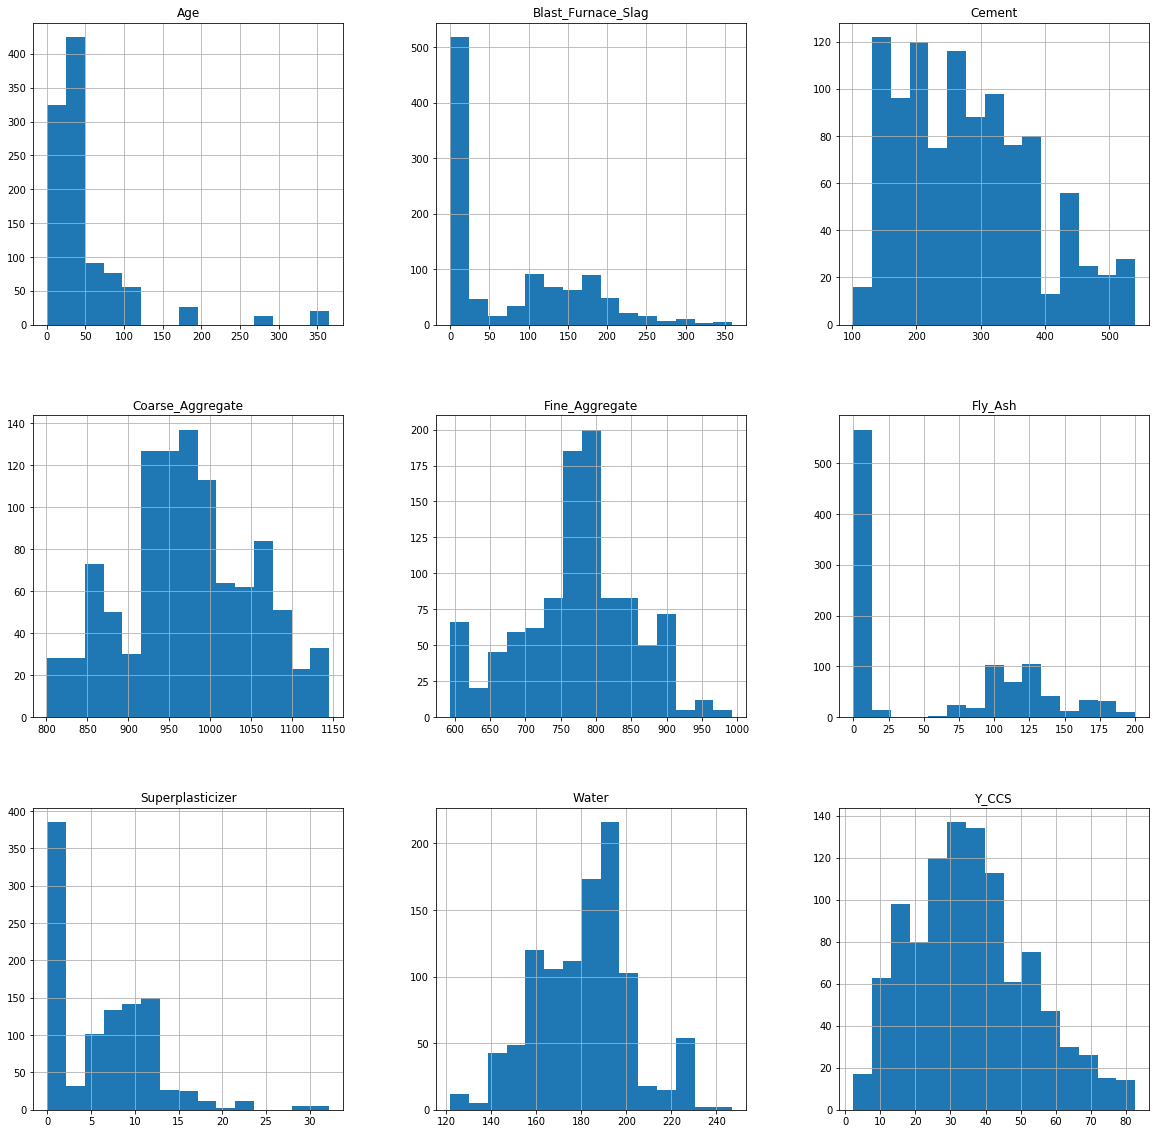

In [47]:
concrete_data.hist(bins=15, figsize=(20,20))
plt.show()

Attribute distribution for feature Cement:


c:\users\user\.conda\envs\tf-std\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


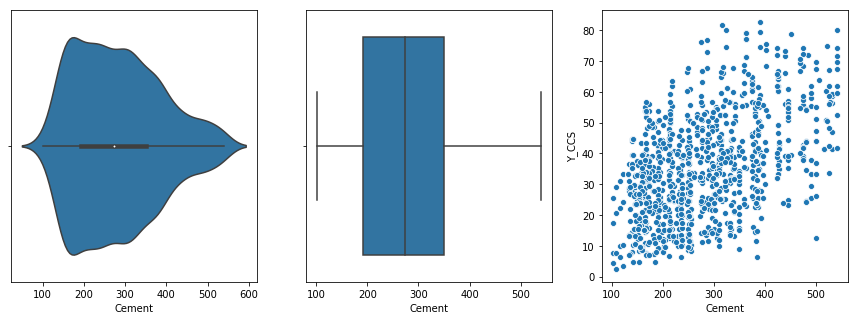

Attribute distribution for feature Blast_Furnace_Slag:


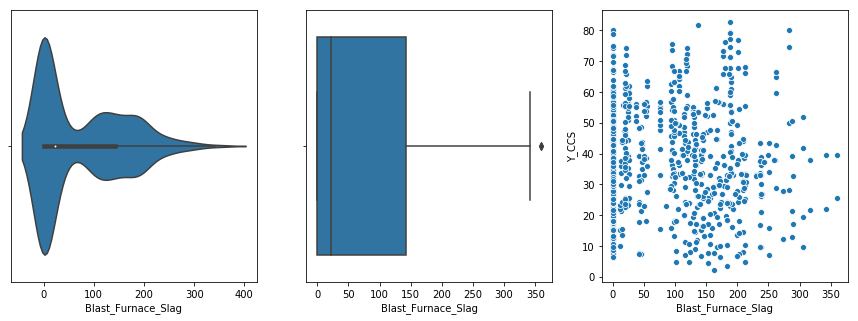

Attribute distribution for feature Fly_Ash:


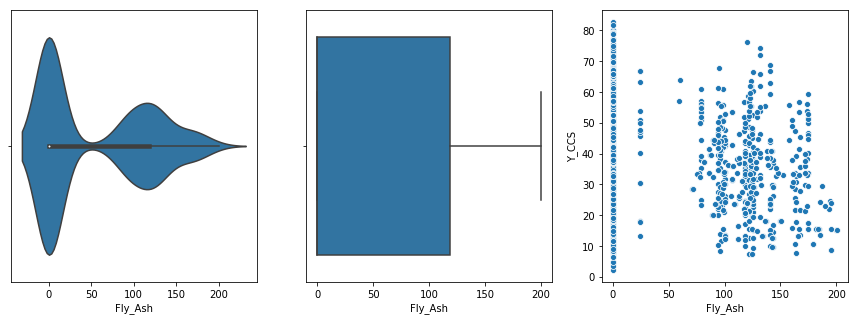

Attribute distribution for feature Water:


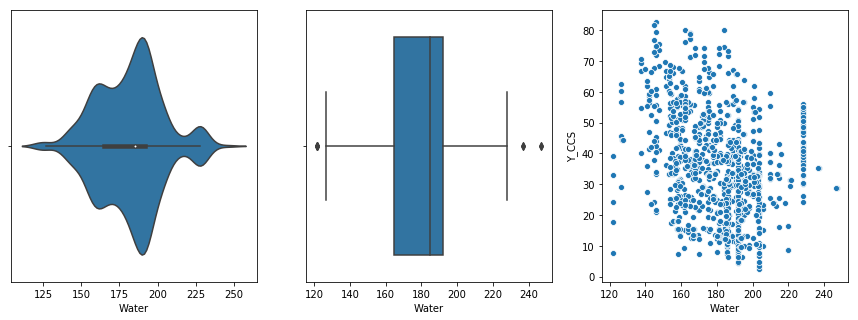

Attribute distribution for feature Superplasticizer:


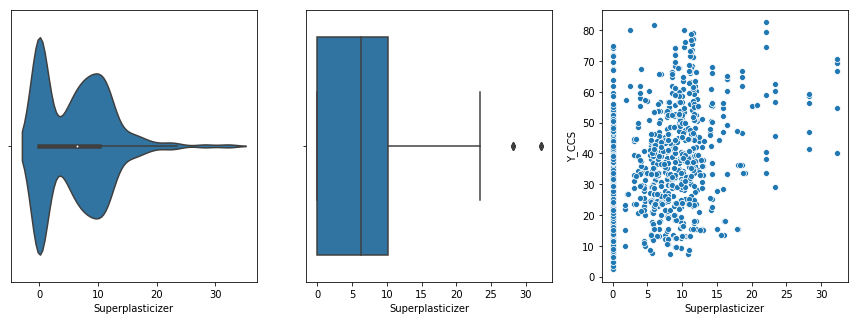

Attribute distribution for feature Coarse_Aggregate:


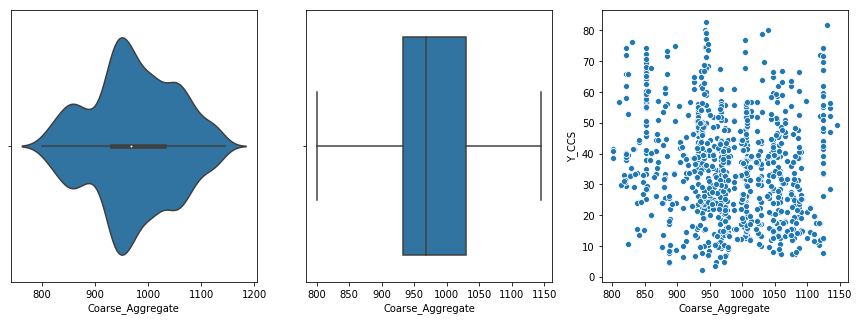

Attribute distribution for feature Fine_Aggregate:


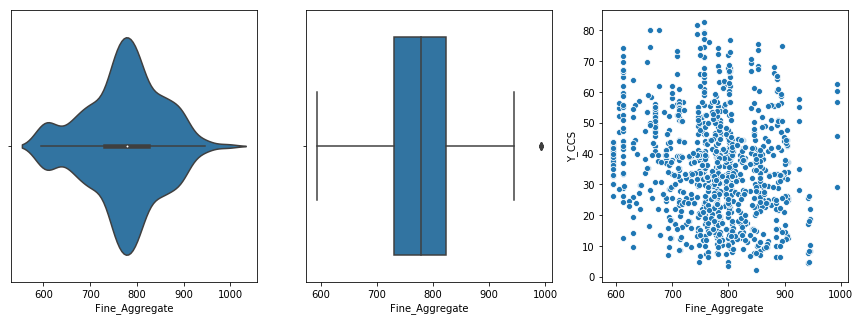

Attribute distribution for feature Age:


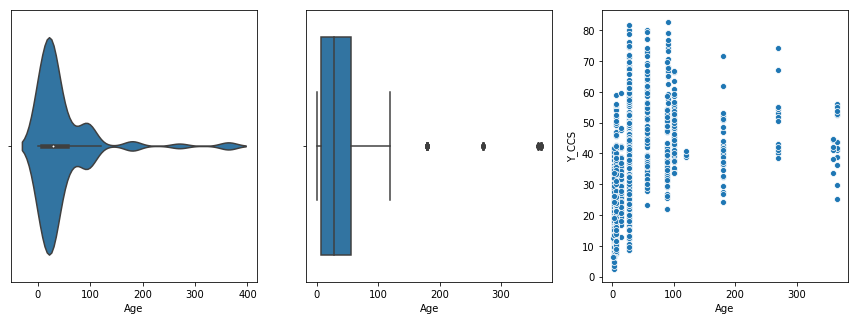

Attribute distribution for feature Y_CCS:


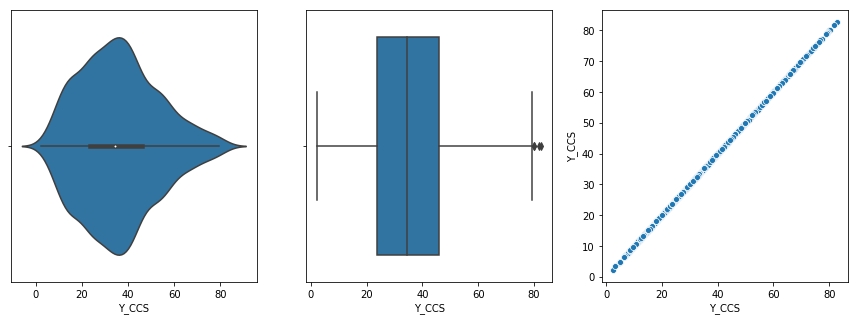

In [48]:
for feature in concrete_data.dtypes[concrete_data.dtypes != object].index:
    print('Attribute distribution for feature {}:'.format(feature))
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    sns.violinplot(x=feature, data=concrete_data)
    plt.subplot(1, 3, 2)
    sns.boxplot(x=feature, data=concrete_data)
    plt.subplot(1, 3, 3)
    sns.scatterplot(x=feature, y='Y_CCS', data=concrete_data)
    plt.show()

### Preprocessing and model training

In [49]:
concrete_labels = concrete_data['Y_CCS']
concrete_data = concrete_data.drop('Y_CCS', axis=1)

In [50]:
concrete_train = concrete_data.sample(frac=0.7, random_state=42) #random state is a seed value
concrete_labels_train = concrete_labels[concrete_train.index]
concrete_test = concrete_data.drop(concrete_train.index)
concrete_labels_test = concrete_labels[concrete_test.index]

In [51]:
print('Training samples:', concrete_train.shape, concrete_labels_train.shape)

Training samples: (721, 8) (721,)


In [52]:
print('Test samples:', concrete_test.shape, concrete_labels_test.shape)

Test samples: (309, 8) (309,)


In [53]:
def ols_reg_fit(X_train_attr, Y_train):
    feature_vals = X_train_attr.values; label_vals = Y_train.values;
    fv_m = np.mean(feature_vals); lv_m = np.mean(label_vals);
    num_features = len(feature_vals)
    
    numerator = np.sum(label_vals * feature_vals) - num_features * lv_m * fv_m 
    denominator = np.sum(feature_vals ** 2) - num_features * (lv_m ** 2)
        
    slope = numerator / denominator
    intercept = lv_m - (slope * fv_m)
    print('Learned coefficients for feature {}:'.format(X_train_attr.name))
    print('Intercept:{}, Slope:{}'.format(intercept, slope))
    return intercept, slope

In [54]:
def ols_reg_predict(X_test_attr, Y_test, x0, x1):
    feature_vals_test = X_test_attr.values; label_vals_test = Y_test.values;
    y = x0 + x1 * feature_vals_test

    plt.figure(figsize=(6,6))
    plt.scatter(feature_vals_test, label_vals_test, color='blue', label='Data Points')
    plt.plot(feature_vals_test, y, color='red', label='Prediction')

    # x-axis label
    plt.xlabel(X_test_attr.name)

    #y-axis label
    plt.ylabel(Y_test.name)

    plt.legend()
    plt.show()

In [55]:
def ols_reg_score(X_test_attr, Y_test, x0, x1):
    feature_vals_test = X_test_attr.values; label_vals_test = Y_test.values;
    
    rmse = 0
    for i in range(len(X_test_attr)):
        y_pred = x0 + x1 * feature_vals_test[i]
        rmse += (label_vals_test[i] - y_pred) ** 2
        rmse = np.sqrt(rmse/len(X_test_attr))
    print('RMSE =', rmse)
    
    ss_t = 0
    ss_r = 0
    for i in range(len(X_test_attr)):
        y_pred = x0 + x1 * feature_vals_test[i]
        ss_t += (label_vals_test[i] - np.mean(label_vals_test)) ** 2
        ss_r += (label_vals_test[i] - y_pred) ** 2
    r2 = 1 - (ss_r/ss_t)
    print('R^2 =', r2)

Learned coefficients for feature Cement:
Intercept:32.7985274797085, Slope:0.010496765684197712


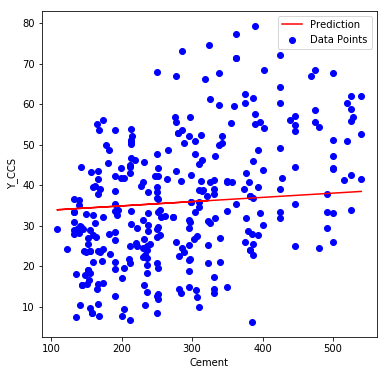

Training set scores:
RMSE = 0.1702242296518935
R^2 = 0.061571218470824585
Test set scores:
RMSE = 0.285645583187544
R^2 = 0.05937201702765704

Learned coefficients for feature Blast_Furnace_Slag:
Intercept:34.32105699310036, Slope:0.019007549422168122


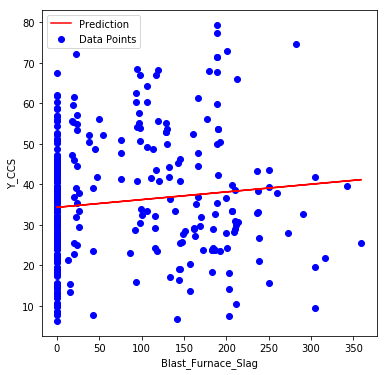

Training set scores:
RMSE = 0.09641064110578078
R^2 = 0.019185920838806325
Test set scores:
RMSE = 0.17945310919362603
R^2 = 0.009891251679233326

Learned coefficients for feature Fly_Ash:
Intercept:36.789306185489494, Slope:-0.01926609561573154


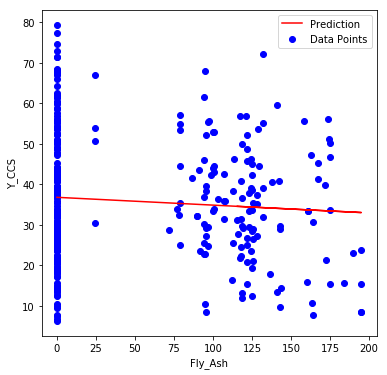

Training set scores:
RMSE = 0.1862795713524955
R^2 = 0.009610630397078879
Test set scores:
RMSE = 0.19304267229553362
R^2 = 0.011400130913967188

Learned coefficients for feature Water:
Intercept:36.320026945918336, Slope:-0.003254342883482896


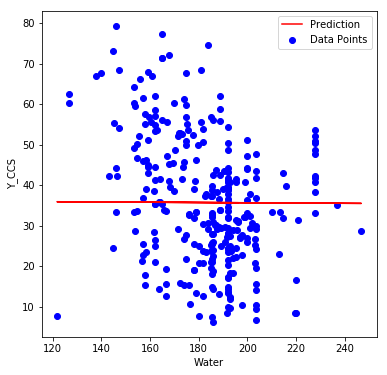

Training set scores:
RMSE = 0.14676648312031193
R^2 = 0.0022914575167592988
Test set scores:
RMSE = 0.2569924023075727
R^2 = 0.0023269962150044288

Learned coefficients for feature Superplasticizer:
Intercept:35.93580540961675, Slope:-0.032124202158486354


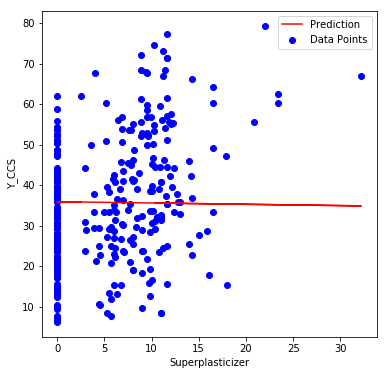

Training set scores:
RMSE = 0.15477943396286992
R^2 = -0.00855898900263563
Test set scores:
RMSE = 0.2525006760673621
R^2 = -0.008830226817950093

Learned coefficients for feature Coarse_Aggregate:
Intercept:35.934426192872465, Slope:-0.0002096723317224987


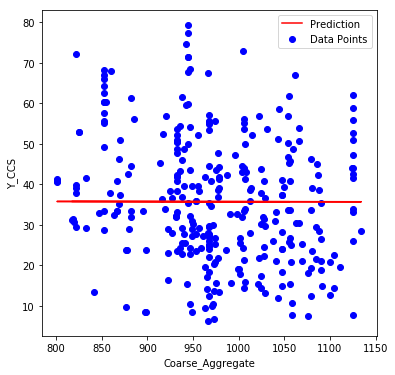

Training set scores:
RMSE = 0.14649184901501752
R^2 = 0.00028324571605276017
Test set scores:
RMSE = 0.26156227017251776
R^2 = 8.106887560499487e-05

Learned coefficients for feature Fine_Aggregate:
Intercept:36.10940595651147, Slope:-0.0004880571186961678


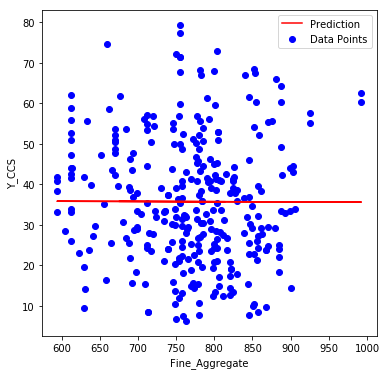

Training set scores:
RMSE = 0.14764048660643173
R^2 = 0.0009804228716577823
Test set scores:
RMSE = 0.2587138518354315
R^2 = -0.00013106846567567665

Learned coefficients for feature Age:
Intercept:32.34523401178993, Slope:0.07377567409121492


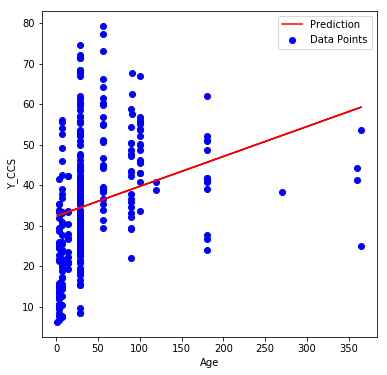

Training set scores:
RMSE = 0.09821227468914742
R^2 = 0.11134957317605976
Test set scores:
RMSE = 0.185638385374782
R^2 = 0.08939331927835958



In [56]:
for feature in concrete_train.dtypes[concrete_train.dtypes != object].index:
    intercept_x0, slope_x1 = ols_reg_fit(concrete_train[feature], concrete_labels_train)
    ols_reg_predict(concrete_test[feature], concrete_labels_test, intercept_x0,
                slope_x1)
    print('Training set scores:')
    ols_reg_score(concrete_train[feature], concrete_labels_train, intercept_x0,
                    slope_x1)
    print('Test set scores:')
    ols_reg_score(concrete_test[feature], concrete_labels_test, intercept_x0,
                    slope_x1)
    print('')

\hspace{0.4cm}By implementing the \textbf{Ordinary Least Squares Regression} using the \textbf{closed-form} solution, we can establish the \textbf{1x1} correlations between the output (\textbf{Concrete Compressive Strength}) and each input feature. We can also derive the \textbf{Intercept}($x_0$) and \textbf{Slope}($x_1$) for each example. Except for the last example (the \textbf{Age} variable), all other models predict a nearly horizontal line. This means that the model is severly \textbf{underfitted} - it cannot find a correlation between the input and output variables. In general, the data distribution does not seem to be representable as a linear function. However, for inference sake, I will also attempt the same task using \textbf{scikit-learn}. 

### Scikit-learn model inference

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Fit a Linear Regression model for each feature

In [58]:
def fit_eval_lr_models(X_train, Y_train, X_test, Y_test, model=LinearRegression()):
    print('Fitting LR model for each feature..')
    for feature in X_train.dtypes[X_train.dtypes != object].index:
        model.fit(
            np.array(X_train[feature]).reshape(-1, 1),
            Y_train)
        y_pred = model.predict(np.array(X_test[feature]).reshape(-1, 1))
        plt.figure(figsize=(7, 7))
        plt.scatter(X_test[feature],
                    Y_test,
                    color='blue',
                    label='Data Points')
        plt.plot(X_test[feature], y_pred, color='red', label='Prediction')
        plt.xlabel(feature)
        plt.ylabel(Y_train.name)
        plt.legend()
        plt.show()

        rmse = np.sqrt(mean_squared_error(Y_test, y_pred))

        print(
            'R^2 (train)=',
            model.score(
                np.array(X_train[feature]).reshape(-1, 1),
                Y_train))
        print(
            'R^2 (test)=',
            model.score(
                np.array(X_test[feature]).reshape(-1, 1),
                Y_test))
        print('RMSE (test)=', rmse)

Fitting LR model for each feature..


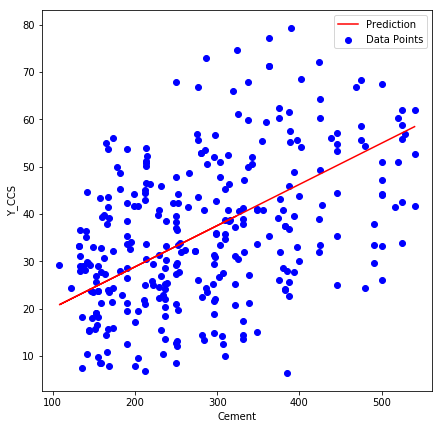

R^2 (train)= 0.27212613788895745
R^2 (test)= 0.17089773672180508
RMSE (test)= 14.2364360256006


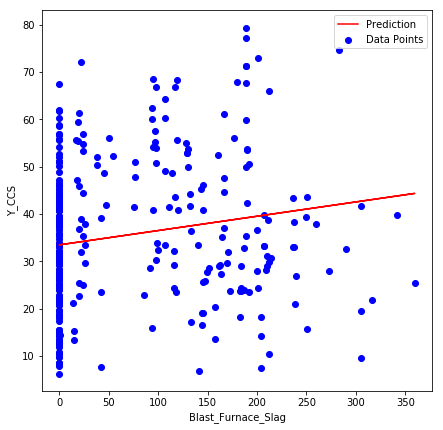

R^2 (train)= 0.022261558964230654
R^2 (test)= 0.004631541230079028
RMSE (test)= 15.59872737752416


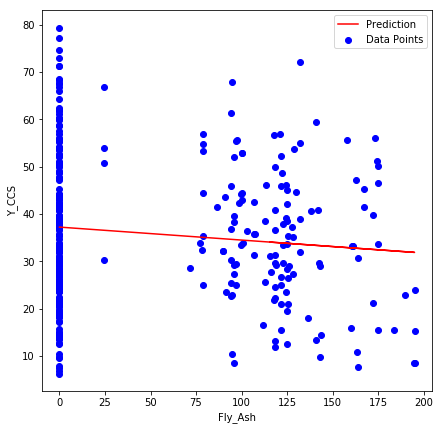

R^2 (train)= 0.010543541349269603
R^2 (test)= 0.012676867142185744
RMSE (test)= 15.535559077991666


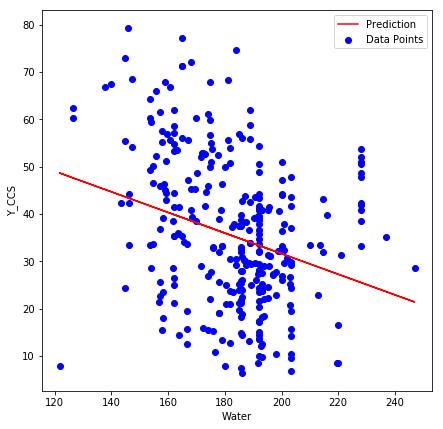

R^2 (train)= 0.07731821792815918
R^2 (test)= 0.10106161760391619
RMSE (test)= 14.823890304230288


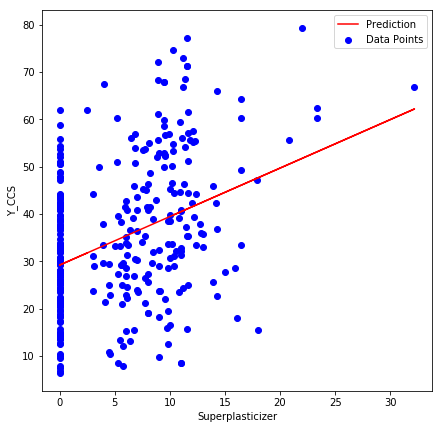

R^2 (train)= 0.13448574497717447
R^2 (test)= 0.13153441888415174
RMSE (test)= 14.570469164566113


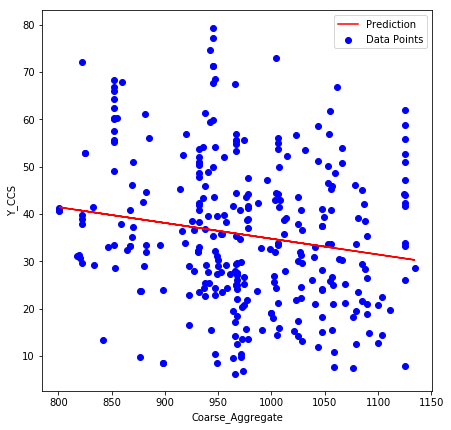

R^2 (train)= 0.022610631391274283
R^2 (test)= 0.039229518626613946
RMSE (test)= 15.325231944696093


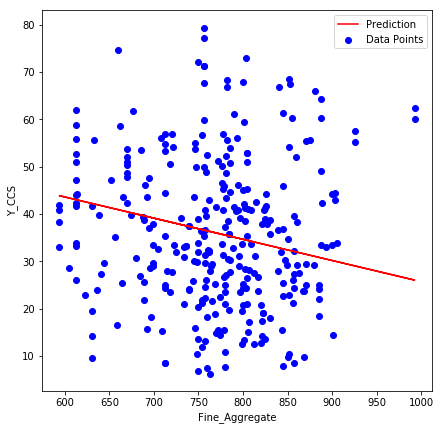

R^2 (train)= 0.04520468370269993
R^2 (test)= -0.029147321175505555
RMSE (test)= 15.861198653972012


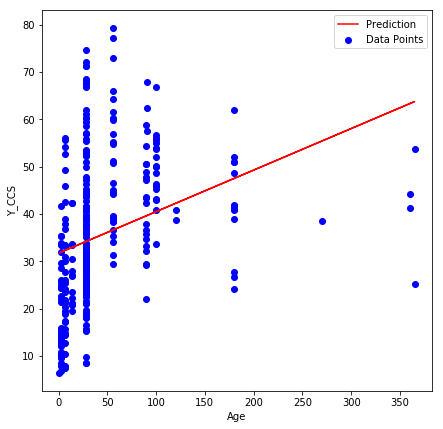

R^2 (train)= 0.11428261824926556
R^2 (test)= 0.09059406288417127
RMSE (test)= 14.909947804801469


In [59]:
fit_eval_lr_models(concrete_train,
                   concrete_labels_train,
                   concrete_test,
                   concrete_labels_test,
                   model=LinearRegression())

\hspace{0.4cm}By performing the task using \textbf{scikit-learn} we can observe slightly better results. This might be due to the fact that the input training data gets automatically normalized (e.g. using \textbf{zero mean} and \textbf{unit variance}). In this case, the best fit for the model would be the \textbf{Cement} variable:

$$R_{test}^2=0.17089773672180508$$
$$RMSE_{test} = 14.2364360256006$$
It achieves the \textbf{lowest RMSE score} and the highest \textbf{$R^2$} coefficient. In addition to this, the data points are linearly separable and seem to follow a slight trend. The slope in this case is positive, which means that the \textbf{Compressive Strength} of \textbf{Cement} increases as its overall amount rises.

Despite this fact, the model is still \textbf{underfit} - the distribution is still not linearly representable and there are also many outliers present. To try to combat this, I will fit a final linear model using information from all of the features - a \textbf{Multivariate Regression Model}. 

### Fit a Multivariate Linear Regression model on all the features

In [79]:
def fit_eval_mlr_model(X_train,
                       Y_train,
                       X_test,
                       Y_test,
                       model=LinearRegression(),
                       column_names=[
                           'Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water',
                           'Superplasticizer', 'Coarse_Aggregate',
                           'Fine_Aggregate', 'Age'
                       ]):
    
    print('Fitting Multivariate LR model..')
    model.fit(X_train, Y_train)
    print('Plotting feature importances..')
    coef = pd.DataFrame(model.coef_.ravel())
    coef["feat"] = column_names
    plt.figure(figsize=(15, 8))
    # Plot taken from Pavan Raj (https://www.kaggle.com/pavanraj159/predicting-compressive-strength-of-concrete)
    ax_feat = sns.barplot(coef["feat"],
                          coef[0],
                          palette="Set1",
                          linewidth=2,
                          edgecolor="k" * coef["feat"].nunique())
    ax_feat.set_facecolor("lightgrey")
    ax_feat.axhline(0, color="k", linewidth=2)
    plt.ylabel('Coefficients')
    plt.xlabel('Features')
    plt.title('Feature importances')
    plt.show()

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    rmse_train = np.sqrt(mean_squared_error(Y_train, y_pred_train))
    rmse_test = np.sqrt(mean_squared_error(Y_test, y_pred_test))
    print('All features: R^2 (train)=', model.score(X_train, Y_train))
    print('All features: R^2 (test)=', model.score(X_test, Y_test))
    print('All features: RMSE (train)=', rmse_train)
    print('All features: RMSE (test)=', rmse_test)

Fitting Multivariate LR model..
Plotting feature importances..


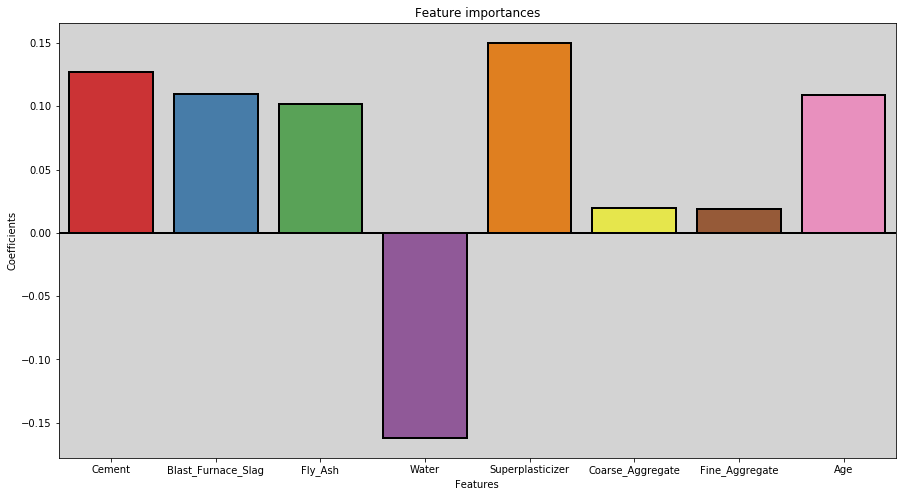

All features: R^2 (train)= 0.6235654428649953
All features: R^2 (test)= 0.5832556549405585
All features: RMSE (train)= 10.51125114666714
All features: RMSE (test)= 10.09327458419177


In [80]:
fit_eval_mlr_model(concrete_train,
                   concrete_labels_train,
                   concrete_test,
                   concrete_labels_test,
                   model=LinearRegression())

### Feature scaling and removing outliers

#### Remove outliers using z-score 
\textbf{Z-score} is signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.

In [115]:
z_train = np.abs(stats.zscore(concrete_train))
z_test = np.abs(stats.zscore(concrete_test))
threshold = 4
print('Amount of outliers detected in train set:', len(np.where(z_train > threshold)[0]))
print('Amount of outliers detected in test set:', len(np.where(z_test > threshold)[0]))

Amount of outliers detected in train set: 20
Amount of outliers detected in test set: 6


In [116]:
concrete_train_o = concrete_train[(z_train < threshold).all(axis=1)]
concrete_labels_train_o = concrete_labels_train[concrete_train_o.index]
concrete_test_o = concrete_test[(z_test < threshold).all(axis=1)]
concrete_labels_test_o = concrete_labels_test[concrete_test_o.index]

In [117]:
print('Train observations:', concrete_train_o.shape)
print('Test observations:', concrete_test_o.shape)

Train observations: (701, 8)
Test observations: (303, 8)


#### Center the data (zero mean, unit variance) 

In [118]:
scaler = StandardScaler()
concrete_train_scaled = scaler.fit_transform(concrete_train_o)
concrete_train_labels_scaled = scaler.fit_transform(
    np.array(concrete_labels_train_o).reshape(-1, 1))
concrete_test_scaled = scaler.fit_transform(concrete_test_o)
concrete_test_labels_scaled = scaler.fit_transform(
    np.array(concrete_labels_test_o).reshape(-1, 1))

#### Fit the new model

Fitting Multivariate LR model..
Plotting feature importances..


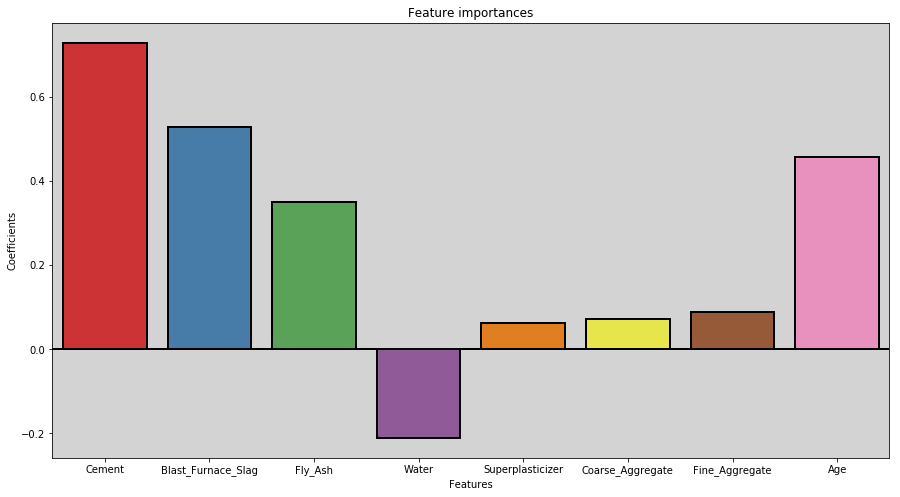

All features: R^2 (train)= 0.6769310517559355
All features: R^2 (test)= 0.6515500420874383
All features: RMSE (train)= 0.5683915448386478
All features: RMSE (test)= 0.5902965000002641


In [119]:
fit_eval_mlr_model(concrete_train_scaled,
                   concrete_train_labels_scaled,
                   concrete_test_scaled,
                   concrete_test_labels_scaled,
                   model=LinearRegression())

\hspace{0.4cm}Unfortunately, the actual prediction here cannot be plotted, due to the fact that the data is \textbf{8-dimensional}. Despite this, we can use \textbf{scikit-learn}'s \textbf{feature importances} to display the correlations between each feature and the output variable. In this case, removing the outliers and scaling the features produces evaluation results are much more reasonable:

$$ R_{train}^2 = 0.68 $$
$$ R_{test}^2 = 0.65 $$
$$ RMSE_{train} = 0.57 $$
$$ RMSE_{test} = 0.59 $$

The \textbf{RMSE} and \textbf{$R^2$} still indicate that the model is underfit, but at least now the model is performing better than random-guessing. The \textbf{feature importances} highlight \textbf{Water} (highest negative correlation) and \textbf{Superplasticizer} (highest positive correlation) as the key features. This might mean that they are the key ingredients that define the \textbf{Compressive Strength}, but further research is required to draw a conclusion. 

### Conclusion

\hspace{0.4cm}In conclusion, the \textbf{Linear Regression} model with all of its variants seems to be inappropriate for this dataset. The best linear model fit was observed using \textbf{Multivariate Linear Regression} on all features. However, this model still suffers from \textbf{underfitting}, because the data distribution is too complex to be represented with a linear function. A higher dimensional \textbf{Regression} method (e.g. \textbf{Polynomial Regression} or any \textbf{Ensemble Learning Regression} model) is expected to achieve a much higher score, but would also need to be appropriately \textbf{regularized}, in order to prevent \textbf{overfitting}.     

### References

[1]. \textbf{Kaggle kernel} - https://www.kaggle.com/pavanraj159/predicting-compressive-strength-of-concrete

[2]. \textbf{Inference on regression model fits} - https://www.theanalysisfactor.com/assessing-the-fit-of-regression-models/

[3]. \textbf{Correlation} - https://www.emathzone.com/tutorials/basic-statistics/positive-and-negative-correlation.html

[4]. \textbf{Ordinary Least Squares Implementation} - https://www.geeksforgeeks.org/linear-regression-python-implementation/

[5]. \textbf{Multivariate Linear Regression} - http://users.stat.umn.edu/~helwig/notes/mvlr-Notes.pdf